# Predicting Diamond Prices Using Machine Learning
# Author  = Abhinav Agrawal
# Kaggle  = https://www.kaggle.com/competitions/diamonds-ds-ft-2109/data

In [4]:
# importing important libraries 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import data 
data = pd.read_csv("C:/DESKTOP/SQL/diamonds.csv")

In [3]:
data 

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# EXPLORATORY DATA ANALYIS

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
data.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [7]:
data.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [8]:
data.index

RangeIndex(start=0, stop=53940, step=1)

In [9]:
data.shape

(53940, 11)

In [10]:
num = data.select_dtypes(include = ['float','int'])

In [11]:
num.corr()

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [12]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [13]:
data.count()

Unnamed: 0    53940
carat         53940
cut           53940
color         53940
clarity       53940
depth         53940
table         53940
price         53940
x             53940
y             53940
z             53940
dtype: int64

In [14]:
num.skew()

Unnamed: 0    0.000000
carat         1.116646
depth        -0.082294
table         0.796896
price         1.618395
x             0.378676
y             2.434167
z             1.522423
dtype: float64

# data cleaning 

In [15]:
# To check null values 
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [16]:
# To check duplicate values 
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Length: 53940, dtype: bool

# NORMALIZATION 

In [17]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Select only the numeric columns for normalization
numeric_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to the numeric columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [18]:
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.006237,Ideal,E,SI2,0.513889,0.230769,0.000000,0.367784,0.067572,0.076415
1,2,0.002079,Premium,E,SI1,0.466667,0.346154,0.000000,0.362197,0.065195,0.072642
2,3,0.006237,Good,E,VS1,0.386111,0.423077,0.000054,0.377095,0.069100,0.072642
3,4,0.018711,Premium,I,VS2,0.538889,0.288462,0.000433,0.391061,0.071817,0.082704
4,5,0.022869,Good,J,SI2,0.563889,0.288462,0.000487,0.404097,0.073854,0.086478
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.108108,Ideal,D,SI1,0.494444,0.269231,0.131427,0.535382,0.097793,0.110063
53936,53937,0.108108,Good,D,SI1,0.558333,0.230769,0.131427,0.529795,0.097623,0.113522
53937,53938,0.103950,Very Good,D,SI1,0.550000,0.326923,0.131427,0.527002,0.096435,0.111950
53938,53939,0.137214,Premium,H,SI2,0.500000,0.288462,0.131427,0.572626,0.103905,0.117610


# Correlation Analysis

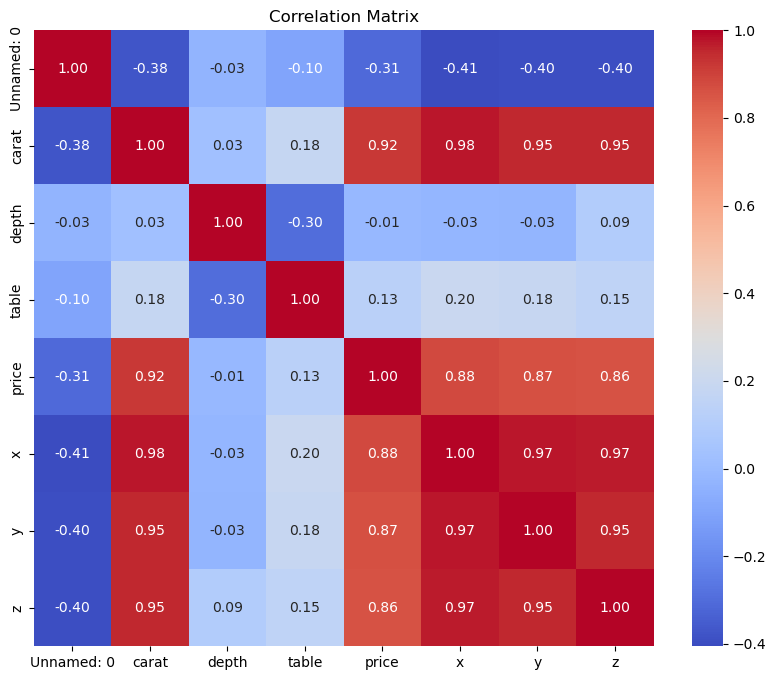

price         1.000000
carat         0.921591
x             0.884435
y             0.865421
z             0.861249
table         0.127134
depth        -0.010647
Unnamed: 0   -0.306873
Name: price, dtype: float64


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = num.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Focus on the correlation with the target variable
correlation_with_target = correlation_matrix['price'].sort_values(ascending=False)
print(correlation_with_target)


# Pearson Correlation for Numerical Variables:

In [20]:
import pandas as pd
from scipy.stats import pearsonr

# Numerical columns to test correlation with price
numeric_columns = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Loop through numeric columns and test correlation with price
for column in numeric_columns:
    corr, p_value = pearsonr(data[column], data['price'])
    print(f"{column}: Pearson correlation = {corr}, P-value = {p_value}")
    
    if p_value < 0.05:
        print(f"Reject the null hypothesis: {column} is significantly correlated with price.\n")
    else:
        print(f"Fail to reject the null hypothesis: {column} is not significantly correlated with price.\n")


carat: Pearson correlation = 0.9215913011934771, P-value = 0.0
Reject the null hypothesis: carat is significantly correlated with price.

depth: Pearson correlation = -0.010647404584142968, P-value = 0.01340324901260609
Reject the null hypothesis: depth is significantly correlated with price.

table: Pearson correlation = 0.12713390212174208, P-value = 3.761533913459459e-193
Reject the null hypothesis: table is significantly correlated with price.

x: Pearson correlation = 0.8844351610161272, P-value = 0.0
Reject the null hypothesis: x is significantly correlated with price.

y: Pearson correlation = 0.8654208978641866, P-value = 0.0
Reject the null hypothesis: y is significantly correlated with price.

z: Pearson correlation = 0.8612494438514485, P-value = 0.0
Reject the null hypothesis: z is significantly correlated with price.



# ANOVA for Categorical Variables:

In [21]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings("ignore")


# Categorical variables to test with ANOVA
categorical_columns = ['cut', 'color', 'clarity']

# Loop through categorical columns and perform ANOVA
for column in categorical_columns:
    model = ols(f'price ~ C({column})', data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"ANOVA results for {column}:\n")
    print(anova_table)
    
    if anova_table['PR(>F)'][0] < 0.05:
        print(f"Reject the null hypothesis: {column} has a significant effect on price.\n")
    else:
        print(f"Fail to reject the null hypothesis: {column} does not have a significant effect on price.\n")


ANOVA results for cut:

               sum_sq       df           F         PR(>F)
C(cut)      32.272688      4.0  175.688717  8.428307e-150
Residual  2476.862819  53935.0         NaN            NaN
Reject the null hypothesis: cut has a significant effect on price.

ANOVA results for color:

               sum_sq       df           F  PR(>F)
C(color)    78.474275      6.0  290.205881     0.0
Residual  2430.661231  53933.0         NaN     NaN
Reject the null hypothesis: color has a significant effect on price.

ANOVA results for clarity:

                 sum_sq       df          F         PR(>F)
C(clarity)    68.123781      7.0  215.01926  1.919090e-316
Residual    2441.011725  53932.0        NaN            NaN
Reject the null hypothesis: clarity has a significant effect on price.



In [22]:
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.006237,Ideal,E,SI2,0.513889,0.230769,0.000000,0.367784,0.067572,0.076415
1,2,0.002079,Premium,E,SI1,0.466667,0.346154,0.000000,0.362197,0.065195,0.072642
2,3,0.006237,Good,E,VS1,0.386111,0.423077,0.000054,0.377095,0.069100,0.072642
3,4,0.018711,Premium,I,VS2,0.538889,0.288462,0.000433,0.391061,0.071817,0.082704
4,5,0.022869,Good,J,SI2,0.563889,0.288462,0.000487,0.404097,0.073854,0.086478
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.108108,Ideal,D,SI1,0.494444,0.269231,0.131427,0.535382,0.097793,0.110063
53936,53937,0.108108,Good,D,SI1,0.558333,0.230769,0.131427,0.529795,0.097623,0.113522
53937,53938,0.103950,Very Good,D,SI1,0.550000,0.326923,0.131427,0.527002,0.096435,0.111950
53938,53939,0.137214,Premium,H,SI2,0.500000,0.288462,0.131427,0.572626,0.103905,0.117610


# Random Forest Regression for Diamond Price Prediction and Feature Importance Analysis

Mean Squared Error: 0.005546295575913634
carat: 0.6169
depth: 0.0255
table: 0.0158
x: 0.0254
y: 0.2973
z: 0.0191


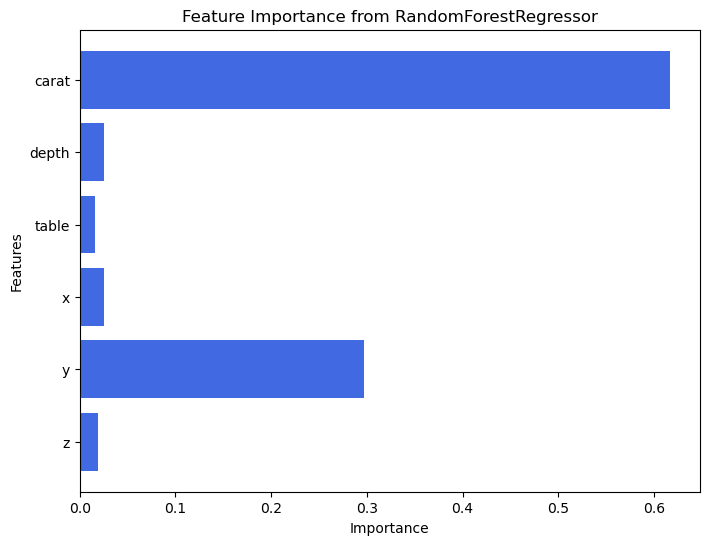

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# Define features and target variable
X = data[['carat', 'depth', 'table', 'x', 'y', 'z',]]
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestRegressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Extract feature importances
feature_importances = rf.feature_importances_
for name, importance in zip(X.columns, feature_importances):
    print(f"{name}: {importance:.4f}")


# Features and their importances (replace these with your actual model outputs)
features = ['carat', 'depth', 'table', 'x', 'y', 'z']
importances = rf.feature_importances_  # Extract feature importances from the trained RandomForest model

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.barh(features, importances, color='royalblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance from RandomForestRegressor')
plt.gca().invert_yaxis()  # Invert y-axis to display highest importance on top
plt.show()

# Data Visualization 

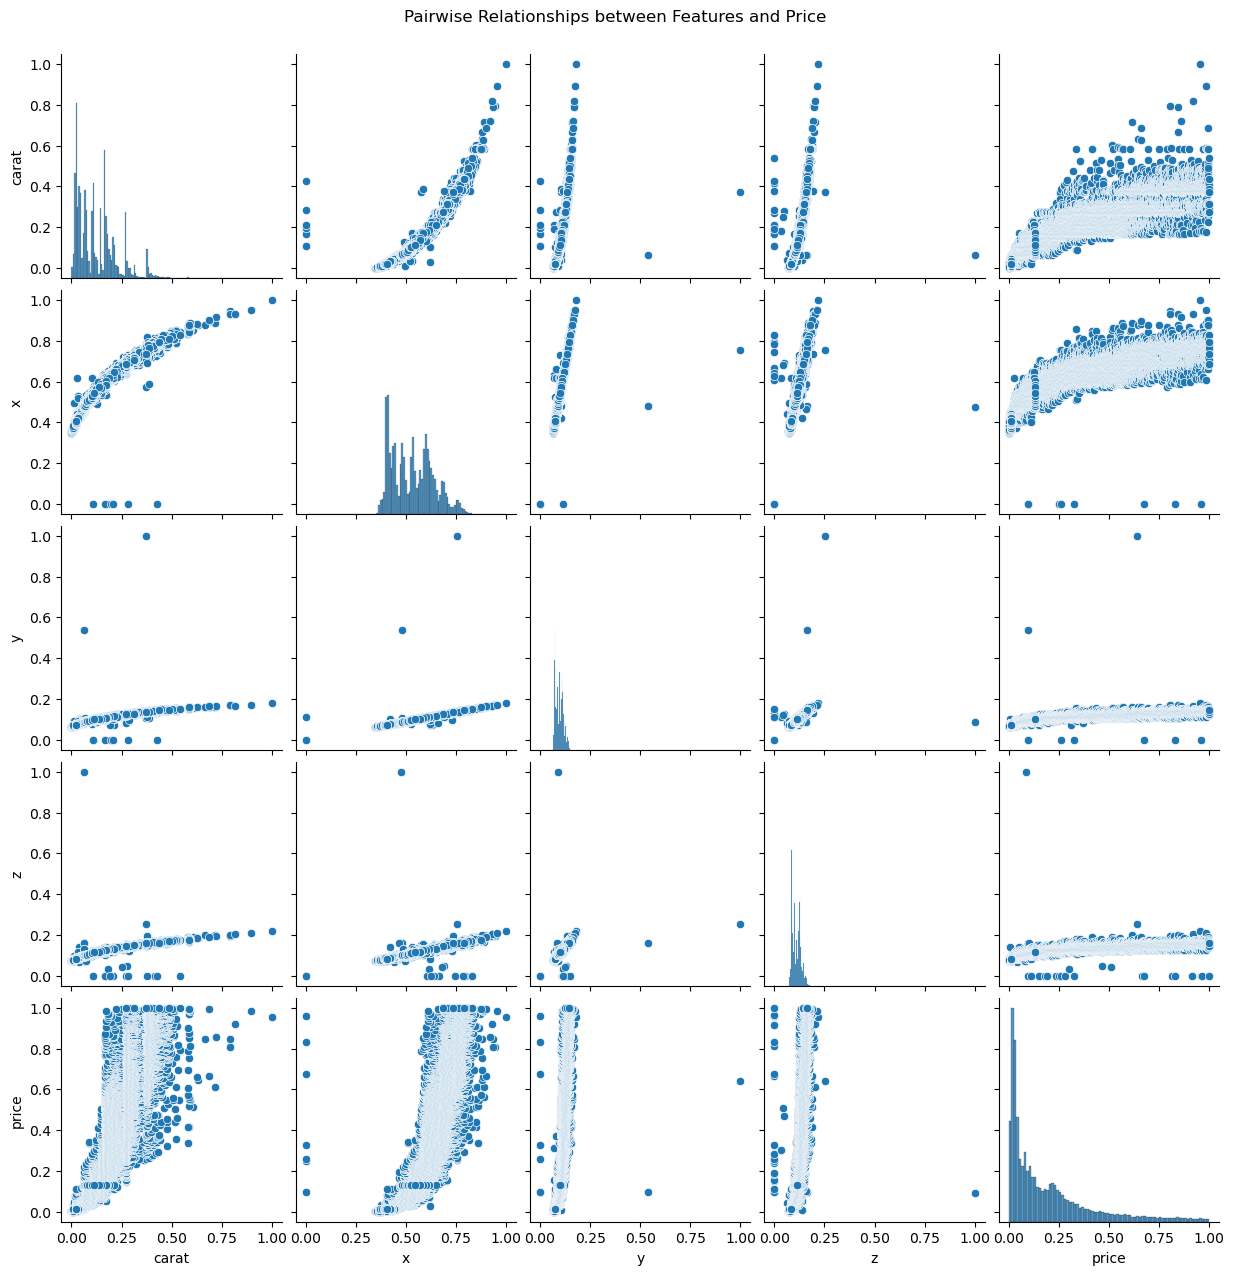

In [51]:
sns.pairplot(data[['carat', 'x', 'y', 'z', 'price']])
plt.suptitle('Pairwise Relationships between Features and Price', y=1.02)
plt.show()

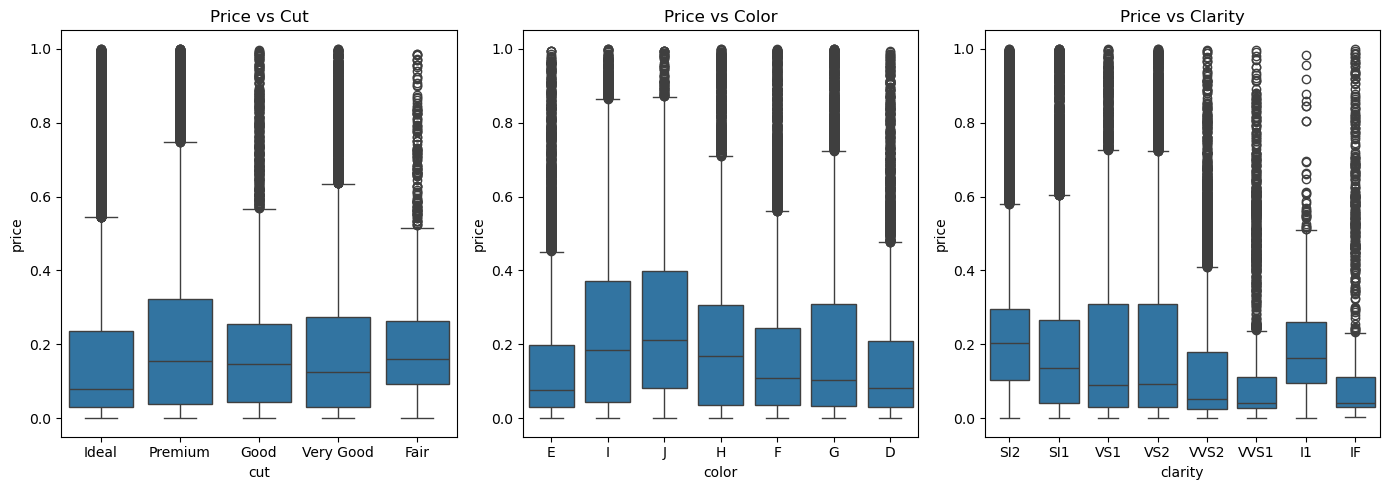

In [28]:
plt.figure(figsize=(14, 5))

# Boxplot for Cut
plt.subplot(1, 3, 1)
sns.boxplot(x='cut', y='price', data=data)
plt.title('Price vs Cut')

# Boxplot for Color
plt.subplot(1, 3, 2)
sns.boxplot(x='color', y='price', data=data)
plt.title('Price vs Color')

# Boxplot for Clarity
plt.subplot(1, 3, 3)
sns.boxplot(x='clarity', y='price', data=data)
plt.title('Price vs Clarity')

plt.tight_layout()
plt.show()

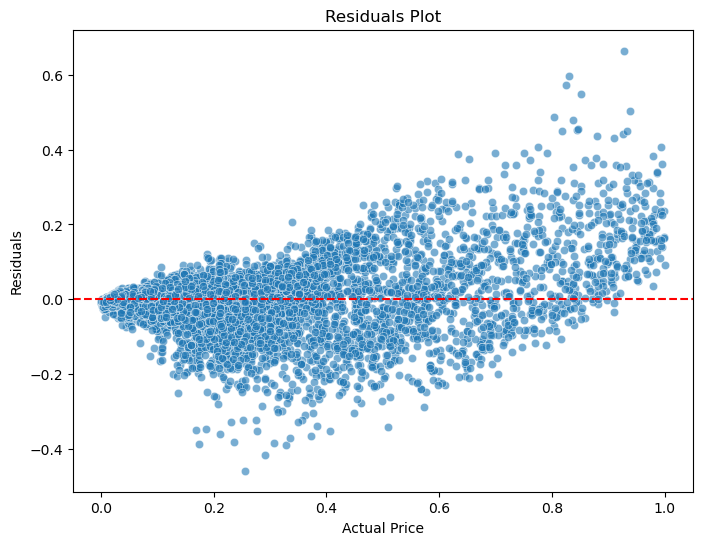

In [30]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict using the trained model
y_pred = rf.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Plot the residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.show()

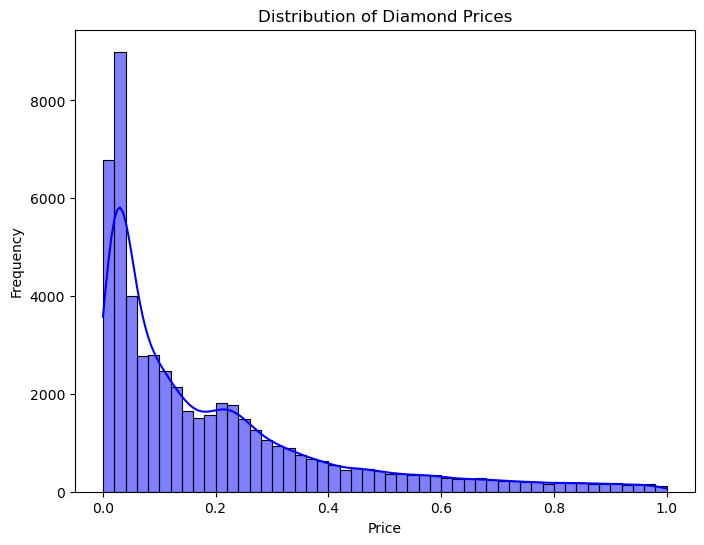

In [31]:
plt.figure(figsize=(8, 6))
sns.histplot(data['price'], bins=50, kde=True, color='blue')
plt.title('Distribution of Diamond Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Machine Learning Models 

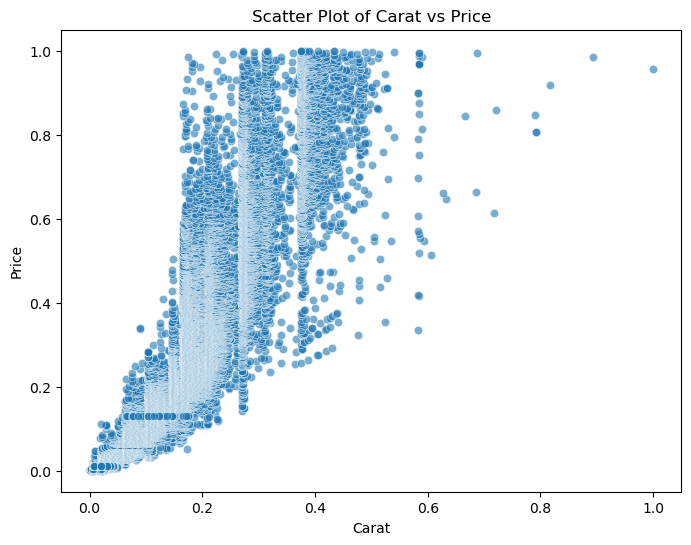

Slope (Coefficient): 2.016997741386623
Intercept: -0.05574284783758132


In [44]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (you can skip this step if data is already loaded)
# Assuming 'data' contains the normalized dataset

# Prepare the feature and target variable
X = data[['carat']]  # Feature: carat (normalized)
y = data['price']    # Target: price (normalized)

# Initialize and fit the linear regression model
lr_model = LinearRegression()
lr_model.fit(X, y)

# Predict the values based on the model
y_pred = lr_model.predict(X)

# Assuming 'data' is your DataFrame containing the diamond dataset
plt.figure(figsize=(8, 6))
sns.scatterplot(x='carat', y='price', data=data, alpha=0.6)
plt.title('Scatter Plot of Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

# Print the coefficients of the model
slope = lr_model.coef_[0]
intercept = lr_model.intercept_

print(f"Slope (Coefficient): {slope}")
print(f"Intercept: {intercept}")


In [45]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.006237,Ideal,E,SI2,0.513889,0.230769,0.000000,0.367784,0.067572,0.076415
1,2,0.002079,Premium,E,SI1,0.466667,0.346154,0.000000,0.362197,0.065195,0.072642
2,3,0.006237,Good,E,VS1,0.386111,0.423077,0.000054,0.377095,0.069100,0.072642
3,4,0.018711,Premium,I,VS2,0.538889,0.288462,0.000433,0.391061,0.071817,0.082704
4,5,0.022869,Good,J,SI2,0.563889,0.288462,0.000487,0.404097,0.073854,0.086478


# Random Forest Model 

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['cut'] = le.fit_transform(data['cut'])
data['color'] = le.fit_transform(data['color'])
data['clarity'] = le.fit_transform(data['clarity'])

Mean Squared Error: 0.04233908726302625


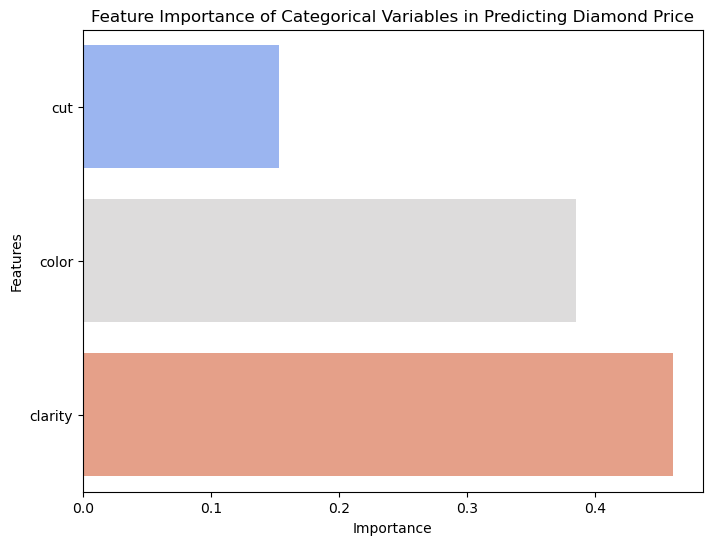

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your dataset

# Label encoding for categorical variables
le = LabelEncoder()
data['cut'] = le.fit_transform(data['cut'])
data['color'] = le.fit_transform(data['color'])
data['clarity'] = le.fit_transform(data['clarity'])

# Define features (categorical columns only) and target variable
X = data[['cut', 'color', 'clarity']]  # Only using categorical columns
y = data['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Calculate and print Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Extract feature importances from the model
feature_importances = rf_model.feature_importances_

# Create a bar plot for feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=X.columns, palette='coolwarm')
plt.title('Feature Importance of Categorical Variables in Predicting Diamond Price')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Decision Tree 

Mean Squared Error: 0.0015249696406128427


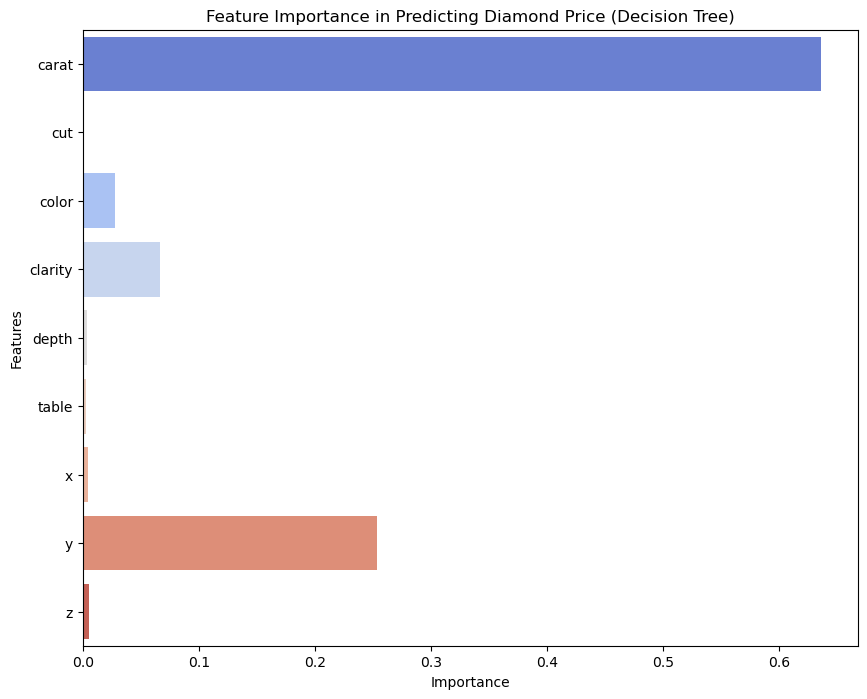

In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your dataset

# Label encoding for categorical variables
le = LabelEncoder()
data['cut'] = le.fit_transform(data['cut'])
data['color'] = le.fit_transform(data['color'])
data['clarity'] = le.fit_transform(data['clarity'])

# Define features (all columns except 'price' and 'Unnamed: 0') and target variable (price)
X = data.drop(columns=['price', 'Unnamed: 0'])  # Dropping price and unnecessary index columns
y = data['price']  # Target variable: price

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the DecisionTreeRegressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test data
y_pred = dt_model.predict(X_test)

# Calculate and print Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Feature importance from the Decision Tree model
feature_importances = dt_model.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances, y=X.columns, palette='coolwarm')
plt.title('Feature Importance in Predicting Diamond Price (Decision Tree)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()